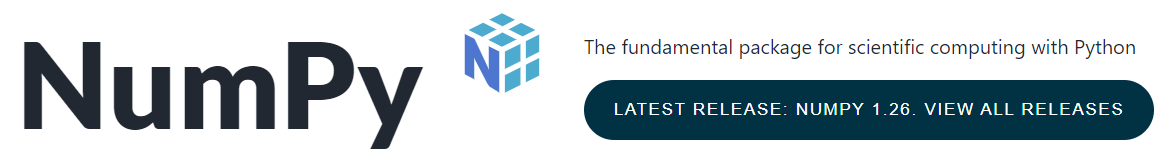

### Funkcje uniweralne i rysowanie wykresów (biblioteka matplotlib)

W tym notatniku omówimy funkcje uniwersalne oraz podstawy tworzenia wykresów w pythonie.

#### Funkcje uniweralne

Funkcje uniwersalne to funkcje, które modyfikują wektor działając kolejno na każdym z jego elementów. Wszystkie funkcje znajdujące się w module `math` są odpowiednikami funkcji unwersalnych w numpy, na przykład: `cos`, `exp`, `log`

In [1]:
# Importujemy numpy
import numpy as np

Numpy posiada wszystkie standardowe funkcje matematyczne typu: sin, cos, tan, exp, log, ... Wszystkie te funkcje działają "element po elemencie".

In [2]:
# Tworzymy przykładowy wektor
numbers = np.array([1, 2, 3, 4])
numbers

array([1, 2, 3, 4])

In [4]:
# Wyznaczamy eksponent utworzonego wektora
exp_numbers = np.exp(numbers)
exp_numbers

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [5]:
# Wyznaczamy cosinus utworzonego wektora
cos_numbers = np.cos(numbers)
cos_numbers

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [6]:
# wyznaczamy logarytm naturalny utworzonego wektora
log_numbers = np.log(numbers)
log_numbers

array([0.        , 0.69314718, 1.09861229, 1.38629436])

In [ ]:
Mamy też do dyspozycji uniwersalne stałe jak pi i podstawa logarytmu naturalnego.

In [7]:
# przemnożenie utworzonego wektora przez pi
mult_pi = np.pi * numbers
mult_pi

array([ 3.14159265,  6.28318531,  9.42477796, 12.56637061])

In [8]:
# przemnożenie utworzonego wektora przez podstawę logarytmu naturalnego
mult_e = np.e * numbers
mult_e

array([ 2.71828183,  5.43656366,  8.15484549, 10.87312731])

#### Zadanie 5

Znajdź logarytm naturalny oraz eksponent zadanego wektora `vector`.

In [9]:
# import biblioteki numpy z aliasem np
import numpy as np

# Definicja wektora `vector`
vector = np.array([1, 4, 5, 10, 13, 9, 10])

# znajdź logarytm wektora `vector`
logarithm = np.log(vector)

# znajdź eksponent wektora `vector`
exponential = np.exp(vector)

#### Rysowanie wykresów z biblioteką Matplotlib

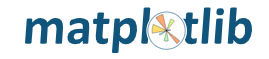

[Matplotlib](https://matplotlib.org/) (*ang. Mathematical plotting library*) - biblioteka do wizualizacji danych w Pythonie

Dokumentacja zaleca instalację biblioteki za pomocą menadżera pakietów `pip` - https://matplotlib.org/stable/users/installing/

```pip install matplotlib```

Nas interesuje moduł [`pyplot`](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py) biblioteki matplotlib. 

matplotlib.pyplot to kolekcja funkcji dzięki którym możemy używać bibioteki w sposób zbliżony do tego jak to robimy w programie `MATLAB`. Wywołujemy kolejno poszczególne funkcje modułu modyfikując powstający w ten sposób wykres. Na koniec wyświetlamy gotowy wykres.

In [14]:
# importujemy moduł pyplot biblioteki matplotlib
import matplotlib.pyplot as plt

Wygenerujmy dane do wykresu

In [11]:
# x
x_values = np.arange(4)
x_values

array([0, 1, 2, 3])

In [12]:
# y
y_values = np.array([4, 6, 2, 4])
y_values

array([4, 6, 2, 4])

Teraz wykres. Biblioteka matplotlib posiada [wiele typów wykresów](https://matplotlib.org/stable/plot_types/index). Najpopularniejszym jest prawdopodobnie wykres liniowy.

#### `plt.plot` - wykres liniowy

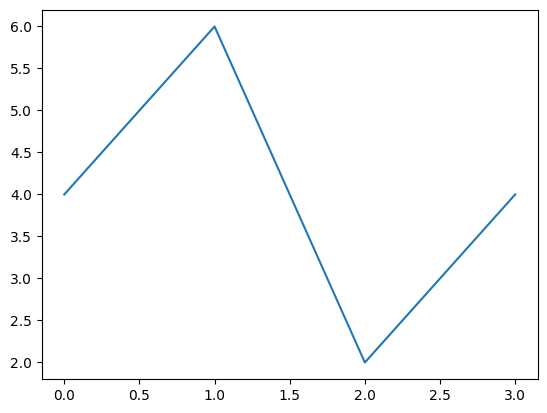

In [15]:
# Wykres y(x) za pomocą funkcji `plt.plot`
plt.plot(x_values, y_values)

Wykres liniowy interpoluje wartości pomiędzy zadanymi punktami liniami prostymi.

Pracując w notatniku jupyter wystarczy wywołać funkcję `plt.plot`, ale w ogólności potrzebne jest jeszcze wywołanie plt.show() do wyświetlenia wygenerowanego wykresu.

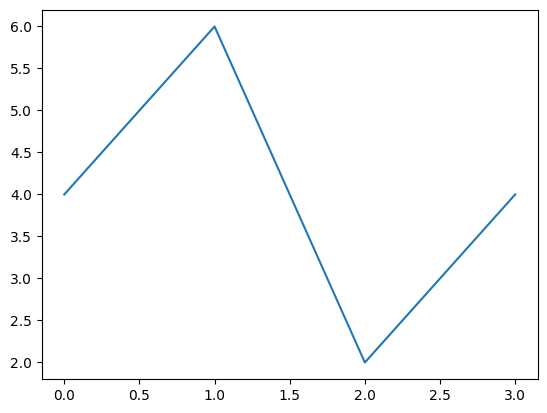

In [16]:
# Użycie funkcji `plt.show`
plt.plot(x_values, y_values)
plt.show()

Teraz użyjmy jakiejś funkcji uniwersalnej

In [17]:
# function f(x) = exp(x)
y_values = np.exp(x_values)
y_values

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692])

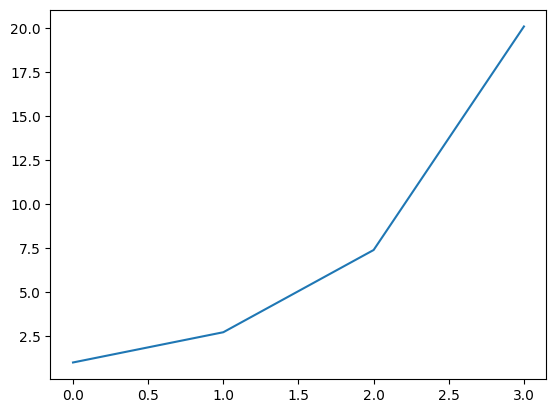

In [20]:
# wykres f(x) = exp(x)
plt.plot(x_values, y_values)

Urzyjmy jakiejś innej funkcji uniwersalnej.

In [21]:
# f(x) = sin(x)
y_values = np.sin(x_values)
y_values

array([0.        , 0.84147098, 0.90929743, 0.14112001])

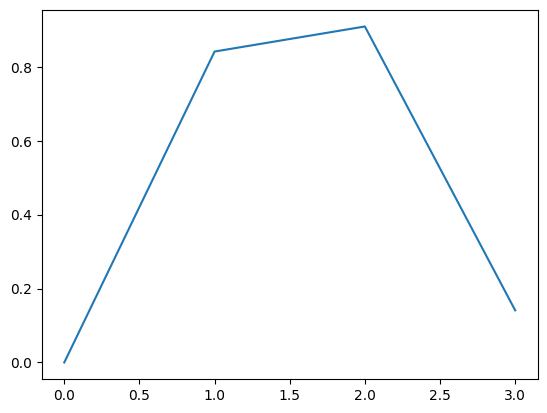

In [23]:
plt.plot(y_values)
plt.show()

Jak już wcześniej powiedzieliśmy, funkcja plot działa w ten sposób, że podajemy jej punkty, a ona rysuje wykres interpolując wartości pomiędzy zadanymi punktami funkcją liniową.

Ale i tak nasz wykres funkcji sinus wygląda dziwacznie. Dlacczego ?

#### Przerywnik - Aliasing

Niekorzystny dobór punktów może prowadzić do przekłamań w sygnale (danych). Zagadnienie znane jest pod nazwą aliasingu i łącznie z takimi zagadnieniami jak częstość próbkowania, częstość Nyquista i twierdzenie o próbkowaniu jest przedmiotem szczególowej analizy na wykładach z analizy sygnałów. 

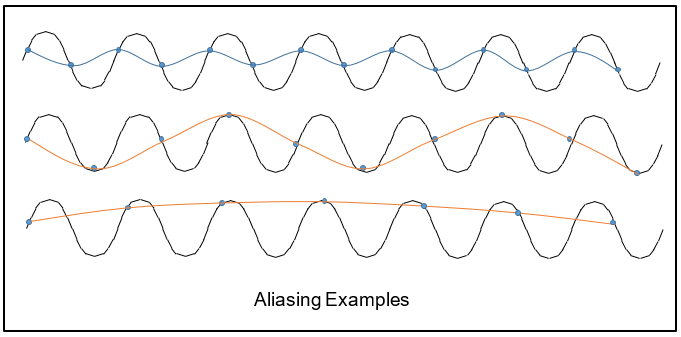

(żródło: https://www.dataforth.com/anti-aliasing)

Ciekawe przykłady aliasingu:
- https://www.youtube.com/watch?v=6XwgbHjRo30
- https://www.youtube.com/watch?v=7EJchzREP5M

Popatrzmy na te same dane na innym równie popularnym wykresie - punktowym.

#### `plt.scatter` - wykres punktowy

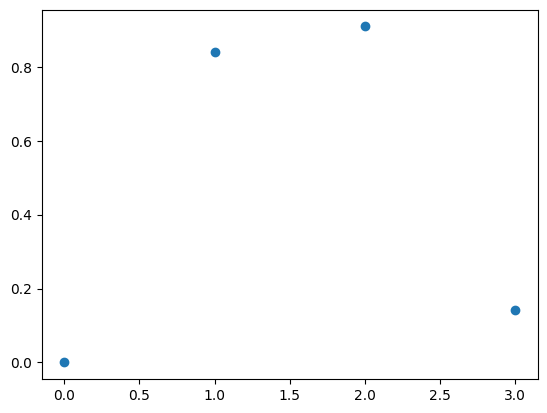

In [24]:
plt.scatter(x_values, y_values)
plt.show()

Wykres liniowy wypełnia przestrzeń pomiędzy punktami liniami prostymi. Zły dobór punktów (częstości próbkowania i ewentualnie faza) może całkowicie zakłamac informacje.

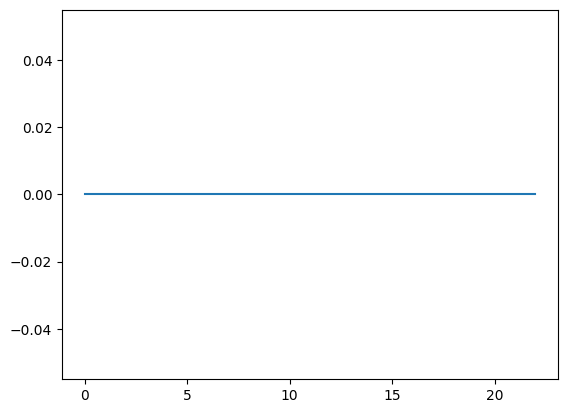

In [26]:
# Wykres f(x) = sin(x) w punktach np.pi, 2*np.pi, ..., 5*np.pi
x = np.arange(0, 8*np.pi, np.pi)
y = np.around(np.sin(x), 5)
plt.plot(x, y)
plt.show()

Mimo, że jest to wykres funkcji sinus otrzymaliśmy linię prostą (próbkowanie nastąpiło wyłącznie w miejscach w których wartość funkcji sinus wynosi 0 $(0, \pi, 2\pi, ...)$

Na jednym "płótnie" można wyświetlać wiele wykresów.

In [39]:
# Dwa wykresu na jednym "płótnie"
x_values_dense = np.arange(0, 6*np.pi, 0.1)
y_values_dense = np.sin(x_values_dense)

x_values_sparse = np.arange(0, 6*np.pi, np.pi)
y_values_sparse = np.sin(x_values_sparse)

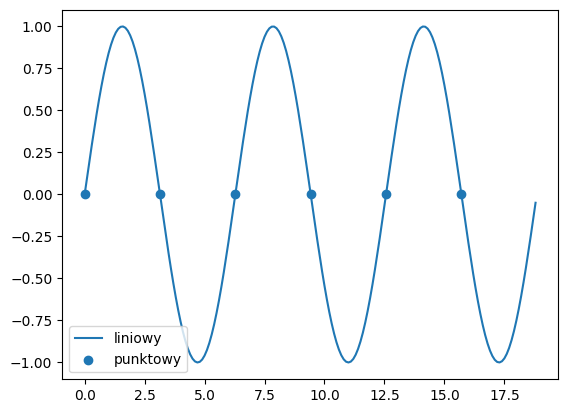

In [65]:
plt.plot(x_values_dense, y_values_dense, label='liniowy')
plt.scatter(x_values_sparse, y_values_sparse, label='punktowy')
plt.legend()
plt.show()

Narysujmy jeszcze raz sinus, tym razem taki który nikogo nie zdziwi.

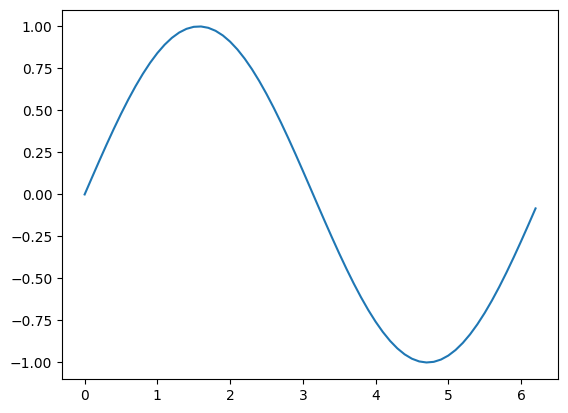

In [42]:
# Wykres liniowy sinusa
x_values = np.arange(0, 2*np.pi, 0.1)
y_values = np.sin(x_values)

plt.plot(x_values, y_values)
plt.show()

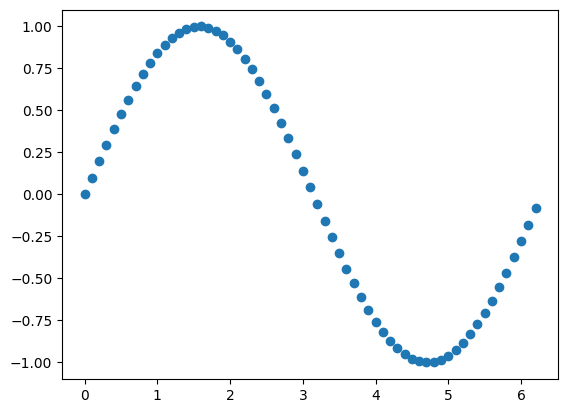

In [43]:
# wykres punktowy sinusa
plt.scatter(x_values, y_values)
plt.show()

Zróbmy zadanie.

Narysuj wykres funkcji $f(x) = 2*\cos(x)$ w przedziale $0$ to $\pi$.

In [45]:
# x
x_values = np.arange(0, np.pi, 0.1)
x_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1])

In [47]:
# y
y_values = 2 * np.cos(x_values)
y_values

array([ 2.        ,  1.99000833,  1.96013316,  1.91067298,  1.84212199,
        1.75516512,  1.65067123,  1.52968437,  1.39341342,  1.24321994,
        1.08060461,  0.90719224,  0.72471551,  0.53499766,  0.33993429,
        0.1414744 , -0.05839904, -0.25768899, -0.45440419, -0.64657913,
       -0.83229367, -1.00969221, -1.17700223, -1.33255204, -1.47478743,
       -1.60228723, -1.71377751, -1.80814428, -1.88444468, -1.94191633,
       -1.97998499, -1.9982703 ])

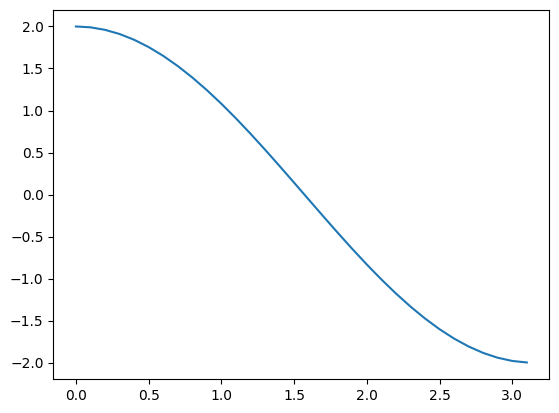

In [63]:
# y(x)
plt.plot(x_values, y_values)
plt.show()

#### `plt.bar` - wykres słupkowy

Wygenerujmy dane

In [51]:
# Opady deszczu na przestrzeni kilku dni
rainfall_mm = [5, 1, 12, 3, 0, 2, 25, 0]
rainfall_vector = np.array(rainfall_mm)
rainfall_vector

array([ 5,  1, 12,  3,  0,  2, 25,  0])

In [52]:
# Etykiety - pierwszy dzień, drugi dzień, ...
number_of_categories = np.arange(1, len(rainfall_vector)+1)
number_of_categories

array([1, 2, 3, 4, 5, 6, 7, 8])

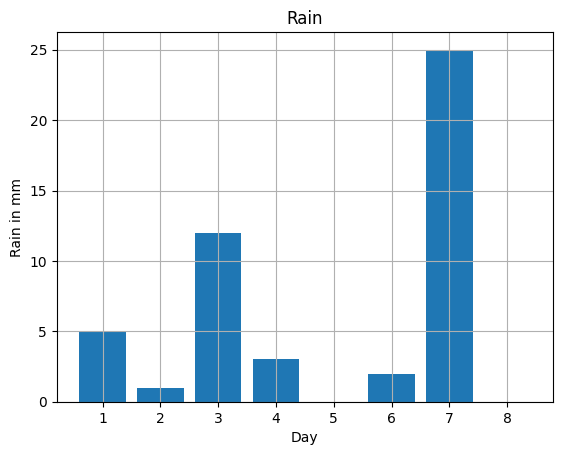

In [62]:
# Wykres słupkowy
plt.bar(number_of_categories, rainfall_mm)
plt.title("Rain")
plt.xlabel("Day")
plt.ylabel("Rain in mm")
plt.grid()
plt.show()

Poajwiły się nowe elementy wykresu takie jak tytuł (*title*) i etykiety (*xlabel, ylabel*). Wszystkie elementy wykresu przedstawia poniższa ilustracja.

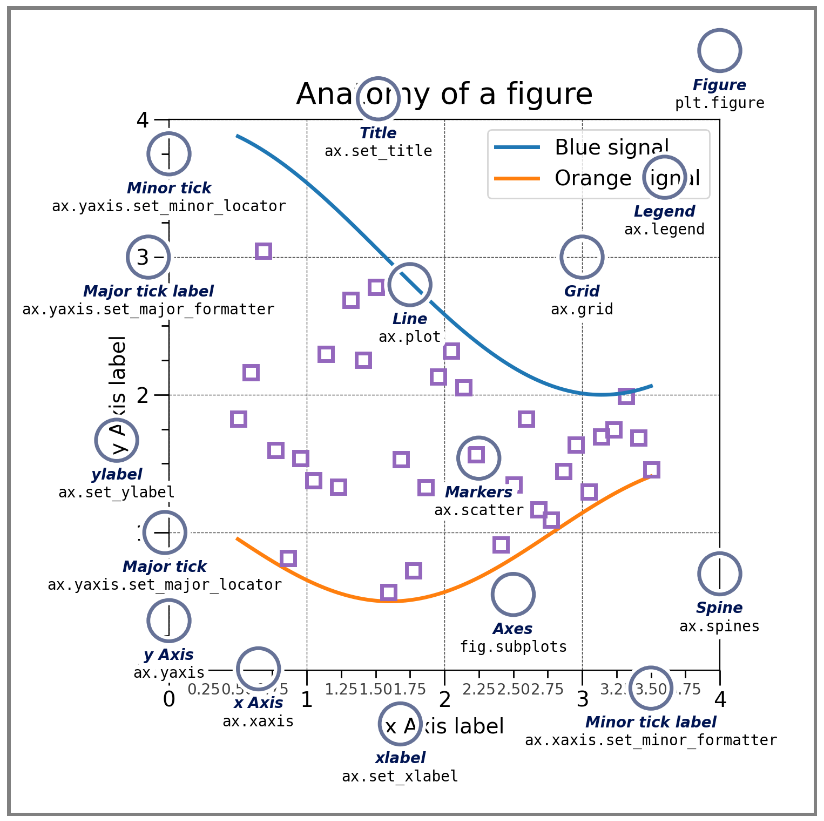

(źródło: https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)